# K-Nearest Neighbor
K-nearest neighbor(KNN) is an algorithm that often used in classification task. It predicts a class for test data by calculating the distances between the test data and all the training data. We are going to implement a KNN classifier with MNIST dataset in this exercise.

MNIST dataset contains 70,000 sets of images and labels for handwritten digits. Each image is 28*28 pixel in grayscale and labeled between 0 to 9.

## Data Preparation and Visualization

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import sys
sys.path.append('/content/drive/MyDrive/KNN/')

In [3]:
from _utils import load_data
import numpy as np
import matplotlib.pyplot as plt

In [4]:
train_data, train_label, test_data, test_label, classes = load_data()

100%|██████████| 9912422/9912422 [00:00<00:00, 371676302.92it/s]

Extracting ./mnist/MNIST/raw/train-images-idx3-ubyte.gz to ./mnist/MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 17821935.24it/s]


Extracting ./mnist/MNIST/raw/train-labels-idx1-ubyte.gz to ./mnist/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 129481977.77it/s]


Extracting ./mnist/MNIST/raw/t10k-images-idx3-ubyte.gz to ./mnist/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 7183457.30it/s]

Extracting ./mnist/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./mnist/MNIST/raw



In [5]:
print(f'Shape of training data: {train_data.shape}')
print(f'Shape of training labels: {train_label.shape}')
print(f'Shape of test data: {test_data.shape}')
print(f'Shape of test labels: {test_label.shape}')
print(f'Number of classes: {len(classes)}')

Shape of training data: (60000, 28, 28)
Shape of training labels: (60000,)
Shape of test data: (10000, 28, 28)
Shape of test labels: (10000,)
Number of classes: 10


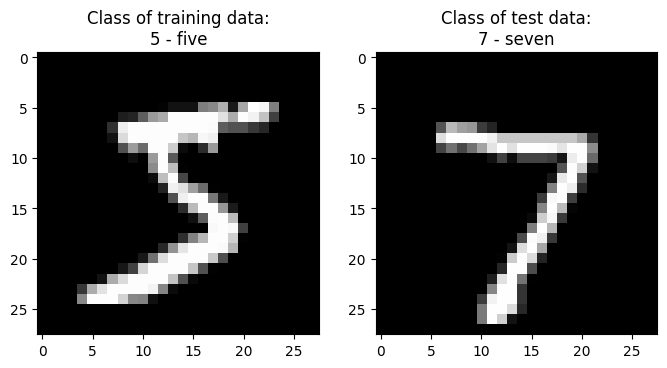

In [6]:
# Display samples of training data and test data with their classes
plt.rcParams['figure.figsize'] = (8, 5)
plt.rcParams['image.cmap'] = 'gray'
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(train_data[0]); ax1.set_title(f'Class of training data:\n{classes[train_label[0]]}')
ax2.imshow(test_data[0]); ax2.set_title(f'Class of test data:\n{classes[test_label[0]]}')
fig.show()

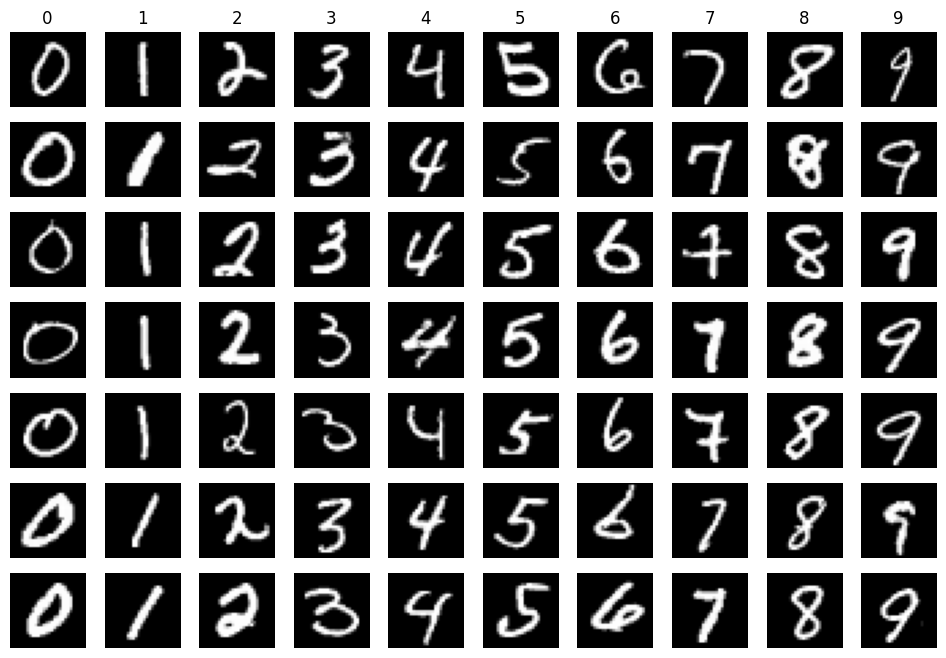

In [7]:
# Display samples of training data from every classes
plt.rcParams['figure.figsize'] = (12, 8)
num_classes = len(classes)
num_example = 7
for label, _ in enumerate(classes):
  idxs = np.flatnonzero(train_label == label)
  idxs = np.random.choice(idxs, num_example, replace=False)
  for i, idx in enumerate(idxs):
    plt_idx = i * num_classes + label + 1
    plt.subplot(num_example, num_classes, plt_idx)
    plt.imshow(train_data[idx]); plt.axis('off')
    if i == 0:
      plt.title(label)
plt.show()

## KNN Implementation

In [8]:
class knn(object):
  def __init__(self, data, label):
    self.num_train_data = data.shape[0]
    self.train_data = data.reshape(self.num_train_data, -1)
    self.train_label = label
  def predict(self, test_data, dist_metric='l1', k=1):
    num_test_data = test_data.shape[0]
    dists = np.zeros((num_test_data, self.num_train_data))
    if dist_metric == 'l1':
      ####################
      # TODO:
      # 1. Flatten test_data, that is, change its shape from (num_test_data, test_data_height, test_data_width) to (num_test_data, flatten_test_data)
      # 2. Caculate L1 distances between test data and all the training data for each test data, and then store distances in variable `dists`
      ####################
      # -----START OF YOUR CODE-----      
      test_data = test_data.reshape(num_test_data, -1)
      for idx in range(num_test_data):
        dists[idx] = np.sum(np.abs(self.train_data.astype(np.int32) - test_data[idx].astype(np.int32)), axis=1)
      # ------END OF YOUR CODE------
    elif dist_metric == 'l2':
      ####################
      # TODO:
      # 1. Flatten test_data, that is, change its shape from (num_test_data, test_data_height, test_data_width) to (num_test_data, flatten_test_data)
      # 2. Caculate L2 distances between test data and all the training data for each test data, and then store distances in variable `dists`
      ####################
      # -----START OF YOUR CODE-----
      test_data = test_data.reshape(num_test_data, -1)
      for idx in range(num_test_data):
        dists[idx] = np.sqrt(np.sum(np.power(self.train_data.astype(np.int32) - test_data[idx].astype(np.int32), 2), axis=1))
      # ------END OF YOUR CODE------
    else:
      raise ValueError("dist_metric can only be 'l1' or 'l2'")

    preds = np.zeros(num_test_data)
    ####################
    # TODO:
    # 1. Take majority vote from k closest data to assign each test data a label, and then store labels in variable `preds`
    ####################
    # -----START OF YOUR CODE-----    
    for idx in range(num_test_data):
      closest = self.train_label[dists[idx].argsort()[:k]]
      preds[idx] = np.argmax(np.bincount(closest))
    # ------END OF YOUR CODE------
    return preds

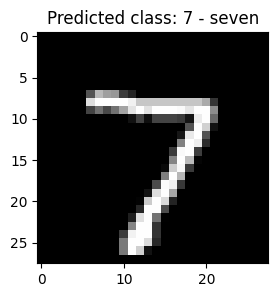

In [9]:
# Run a single test
single_test_data = test_data[:1]
num_test_data, test_data_height, test_data_width = single_test_data.shape
classifier = knn(train_data, train_label)
predicted_label = classifier.predict(single_test_data, k=1, dist_metric='l2')[0].astype(np.int32)
plt.rcParams['figure.figsize'] = (3, 3)
plt.imshow(single_test_data.reshape(test_data_height, test_data_width)); plt.title(f'Predicted class: {classes[predicted_label]}')
plt.show()

## Applied in Small Dataset 

In [10]:
small_train_data = train_data[:5000]
small_train_label = train_label[:5000]
small_test_data = test_data[:500]
small_test_label = test_label[:500]
classifier = knn(small_train_data, small_train_label)
print(f'Number of training data: {small_train_data.shape[0]}')
print(f'Number of test data: {small_test_data.shape[0]}')

Number of training data: 5000
Number of test data: 500


In [11]:
num_test_data = small_test_data.shape[0]
for dm in ['l1', 'l2']:
  print(f'Using {dm.upper()} distance metric:')
  for kv in [2, 3, 4, 10, 20]:
    preds = classifier.predict(small_test_data, k=kv, dist_metric=dm)
    num_correct = np.sum(preds == small_test_label)
    accuracy = float(num_correct) / num_test_data
    print(f'k = {kv}, accuracy = {accuracy}')
  print('')

Using L1 distance metric:
k = 2, accuracy = 0.884
k = 3, accuracy = 0.892
k = 4, accuracy = 0.896
k = 10, accuracy = 0.878
k = 20, accuracy = 0.85

Using L2 distance metric:
k = 2, accuracy = 0.894
k = 3, accuracy = 0.918
k = 4, accuracy = 0.912
k = 10, accuracy = 0.89
k = 20, accuracy = 0.876



## Applied in Whole Dataset
Try your best to find ideal choices of k value `kv` and distance metric `dm` to maximize the accuracy!

In [12]:
# -----You may change values here-----
kv = 3
dm = 'l2'
# ---------------------------------------

num_test_data = test_data.shape[0]
preds = classifier.predict(test_data, k=kv, dist_metric=dm)
num_correct = np.sum(preds == test_label)
accuracy = float(num_correct) / num_test_data
print(f'Using {dm.upper()} distance metric, k = {kv}\nAccuracy = {accuracy}')

Using L2 distance metric, k = 3
Accuracy = 0.9339
